### Packages

In [1]:
using DynamicalSystems, DifferentialEquations, OrdinaryDiffEq, StaticArrays
E = x = u = y =  -10..10
box = E × x × u × y
using CairoMakie

### Functions

In [2]:
function model(u, p ,t)
    
    E, x, u_, y = u
    τ, α, τ_D, J, U0, ΔU0, τ_y, β, xthr, ythr, I0 = p
    
    U(y, U0, ΔU0, ythr) = U0 + ΔU0 / ( 1 + exp( -50 * ( y - ythr ) ) )
    σ(x, xthr)= 1 / (1 + exp(-20 * (x - xthr)));
    
    du1 = (-E + α * log( 1 + exp( ( J * u_ * x * E + I0 ) / α ) )) / τ
    du2 = ( 1 - x ) / τ_D - u_ * x * E
    du3 = (U(y, U0, ΔU0, ythr) - u_) / τ_F + U(y, U0, ΔU0, ythr) * ( 1 - u_ ) * E
    du4 = -y /  τ_y + β * σ(x, xthr)
    
    return SVector(du1, du2, du3, du4)
    
end;

function output(index_i, index_j, U0_lc, I0_lc, u0_lc)
        println("index i: $index_i"); flush(stdout)
        println("index j: $index_j"); flush(stdout)
        println("U0: $U0_lc;"); flush(stdout)
        println("I0: $I0_lc;"); flush(stdout)
        println("u0: $u0_lc;"); flush(stdout)
end
function separate()
    println(" --------------------- "); flush(stdout)
    println("  "); flush(stdout)
end

function parabola(x)
    a = 0.13625841750841752
    b = 0.189709595959596
    c = 0.22
    return  a * (x.^2) + b * x .+ c 
end

function print_output(index, I0, U0, initial_condition)
    println("index: $index");flush(stdout)
    println("I0: $I0");flush(stdout)
    println("U0: $U0");flush(stdout)
    println("initial condition: $initial_condition")
end
function separate()
    println("_________________")
    println("")
end

separate (generic function with 1 method)

### Parametres

In [3]:
τ = 0.013; τ_D = 0.15; τ_y = 1.8; τ_F = 1;
α = 1.5; J = 3.07; β = 0.4375
ΔU0 = 0.305
xthr = 0.9; ythr = 0.5
parametres = SA[ τ, α, τ_D, J, NaN, ΔU0, τ_y, β, xthr, ythr, -1 ]
timefinal = 2000.0
println(parametres)

[0.013, 1.5, 0.15, 3.07, NaN, 0.305, 1.8, 0.4375, 0.9, 0.5, -1.0]


In [4]:
I0 = -1.74950000; U0 = 0.303;
parametres = SA[  τ, α, τ_D, J, U0, ΔU0, τ_y, β, xthr, ythr, I0  ]


ds = ContinuousDynamicalSystem( model, SA[2.9537, 0.7811, 0.6321, 0.066], parametres )
fp, eigs, stable = fixedpoints(ds, box);
first_eq = fp[1]
second_eq = fp[2]
third_eq = fp[3]
println(third_eq)

condition = first_eq - [0.0001, 0.0001, 0.0001, 0.0001]
println(condition)

ds = ContinuousDynamicalSystem( model, condition, parametres )

tr = trajectory(ds, timefinal, Δt = 0.001;
                    diffeq = (alg = RK4(), adaptive = false, dense = false, dt = 0.001))

[0.9397283564720991, 0.9246398827446054, 0.5781963589068092, 0.48885264739440026]
[2.9520579964220697, 0.7812073469122367, 0.6319936527438812, 0.06698585311546033]


4-dimensional Dataset{Float64} with 2000001 points
 2.95206  0.781207  0.631994  0.0669859
 2.95197  0.781208  0.631994  0.0669858
 2.95188  0.78121   0.631994  0.0669858
 2.95179  0.781211  0.631994  0.0669858
 2.9517   0.781212  0.631994  0.0669858
 2.9516   0.781213  0.631994  0.0669858
 2.95151  0.781215  0.631995  0.0669858
 2.95141  0.781216  0.631995  0.0669858
 2.95131  0.781218  0.631995  0.0669858
 2.95121  0.781219  0.631995  0.0669858
 2.95111  0.78122   0.631995  0.0669858
 2.951    0.781222  0.631995  0.0669858
 2.95089  0.781223  0.631995  0.0669858
 ⋮                            
 1.74705  0.874715  0.636346  0.482498
 1.74971  0.874577  0.636352  0.482395
 1.75238  0.874439  0.636357  0.482291
 1.75507  0.874301  0.636363  0.482187
 1.75777  0.874162  0.636368  0.482082
 1.76049  0.874023  0.636373  0.481978
 1.76323  0.873884  0.636378  0.481873
 1.76598  0.873744  0.636383  0.481768
 1.76875  0.873603  0.636388  0.481663
 1.77153  0.873462  0.636393  0.481558
 1.77433

In [5]:
newcondtion = tr[end, :];
tr = 0;

ds = ContinuousDynamicalSystem( model, newcondtion, parametres )

tr = trajectory(ds, timefinal, Δt = 0.001;
                    diffeq = (alg = RK4(), adaptive = false, dense = false, dt = 0.001))

4-dimensional Dataset{Float64} with 2000001 points
 1.77715   0.873179  0.636401  0.481346
 1.77999   0.873037  0.636405  0.48124
 1.78284   0.872894  0.636409  0.481134
 1.78571   0.872751  0.636413  0.481027
 1.7886    0.872607  0.636417  0.480921
 1.7915    0.872463  0.63642   0.480814
 1.79443   0.872318  0.636424  0.480706
 1.79737   0.872173  0.636427  0.480599
 1.80034   0.872027  0.63643   0.480491
 1.80332   0.871881  0.636433  0.480383
 1.80632   0.871734  0.636436  0.480275
 1.80935   0.871587  0.636439  0.480167
 1.81239   0.871439  0.636441  0.480058
 ⋮                             
 0.913393  0.731786  0.732251  0.0891617
 0.914032  0.73308   0.731896  0.0891269
 0.914727  0.734364  0.731541  0.0890926
 0.915476  0.735639  0.731187  0.0890587
 0.916277  0.736904  0.730834  0.0890252
 0.917128  0.73816   0.730481  0.0889921
 0.918029  0.739407  0.730129  0.0889594
 0.918978  0.740644  0.729777  0.0889271
 0.919974  0.741871  0.729426  0.0888953
 0.921016  0.74309   0.729075

In [6]:
function plane(x, y, fp1, fp2, fp3)
    """
    E 1
    x 2
    u 3
    y 4
    """
    y0 = fp1[3]
    y1 = fp2[3]
    y2 = fp3[3]
    
    x0 = fp1[2]
    x1 = fp2[2]
    x2 = fp3[2]
    
    z0 = fp1[1]
    z1 = fp2[1]
    z2 = fp3[1]
    
    a = (y1 .- y0)*(z2.-z0).-(y2.-y0)*(z1.-z0)
    b = (x1.-x0)*(z2.-z0).-(x2.-x0)*(z1.-z0)
    c = (x1.-x0)*(y2.-y0).-(x2.-x0)*(y1.-y0)
    
    z = (-(x.-x0)*a .+ (y.-y0)*b) ./ c .+ z0
    return z
end

plane (generic function with 1 method)

In [7]:
x_ = range(0, 1, length = 100)
y_ = range(0, 1, length = 100)
z_ = plane(x_, y_, first_eq, second_eq, third_eq)

-10.090494292246612:0.218649725108097:11.55582849345499

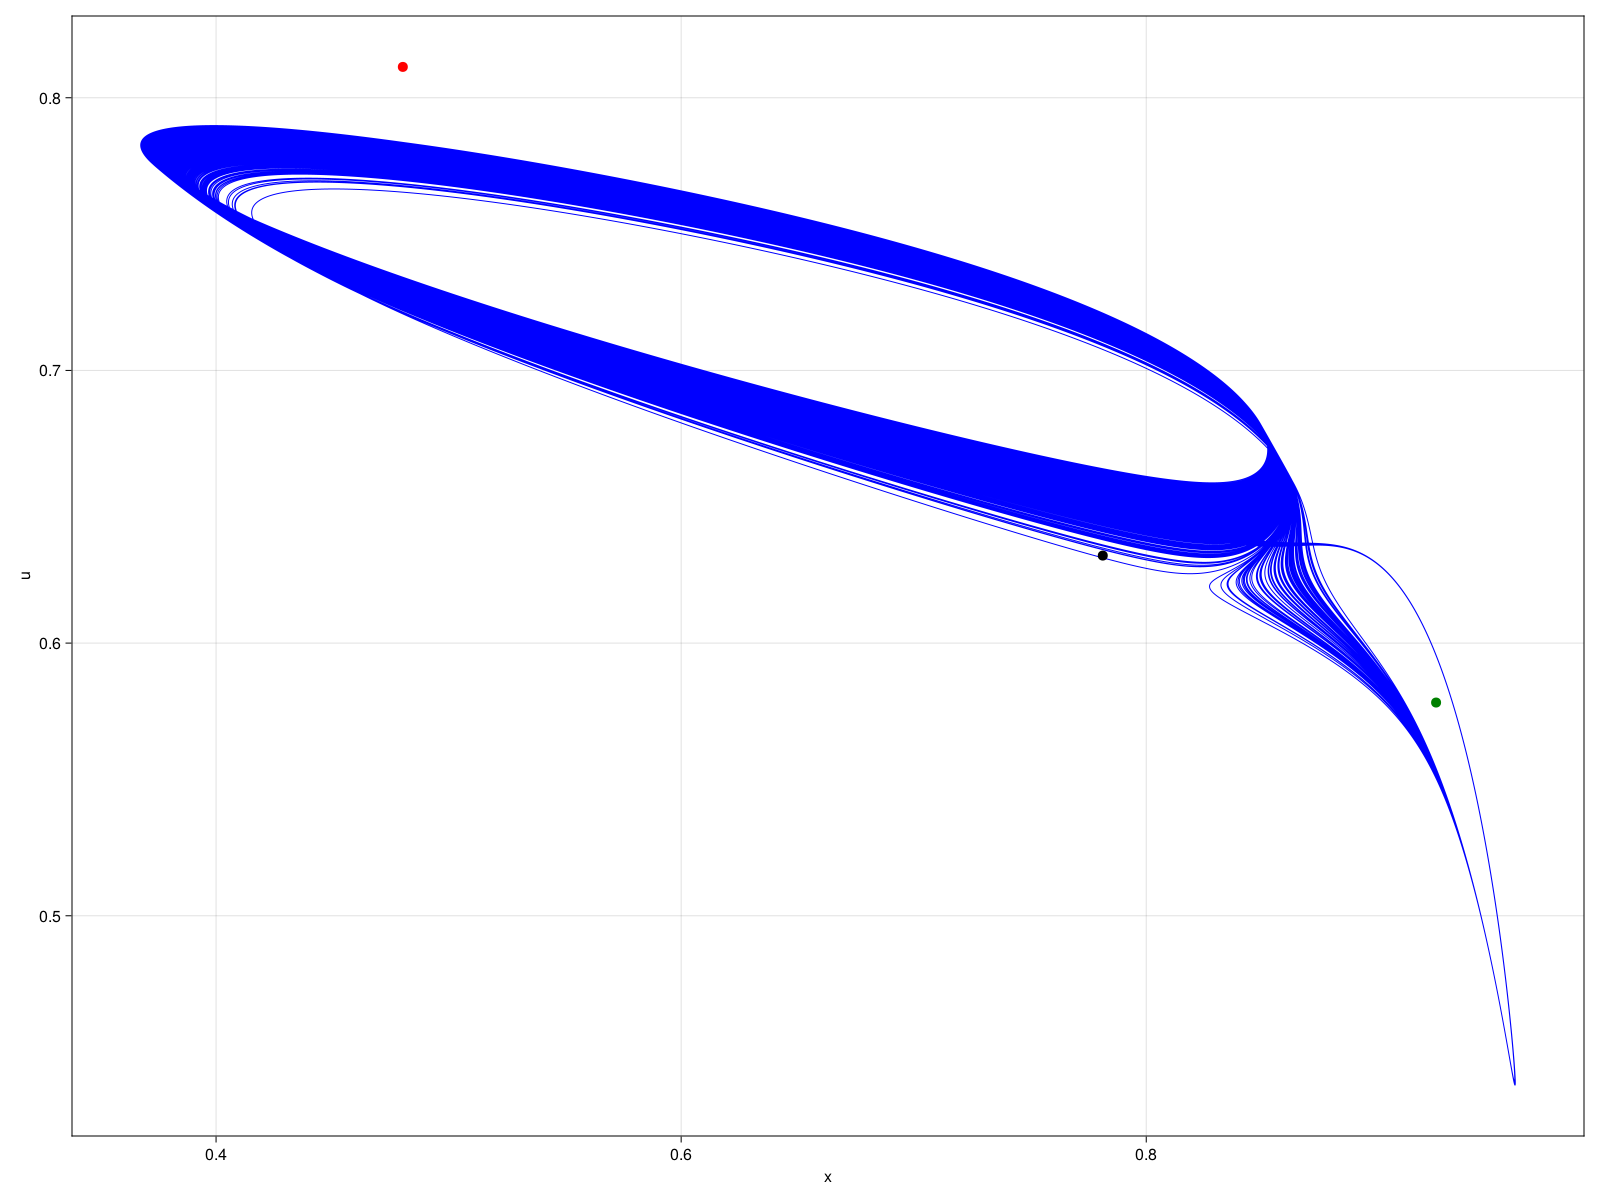

In [8]:
f = Figure(resolution = (1600, 1200))
ax = Axis(f[1, 1], xlabel = "x", ylabel = "u")

tf = 2000000

lines!(tr[1:tf, 2], tr[1:tf, 3], linewidth = 1, color = "blue")

scatter!( first_eq[2], first_eq[3], color = "black", markersize = 10 )
scatter!( second_eq[2], second_eq[3], color = "red", markersize = 10 )
scatter!( third_eq[2], third_eq[3], color = "green", markersize = 10 )
f

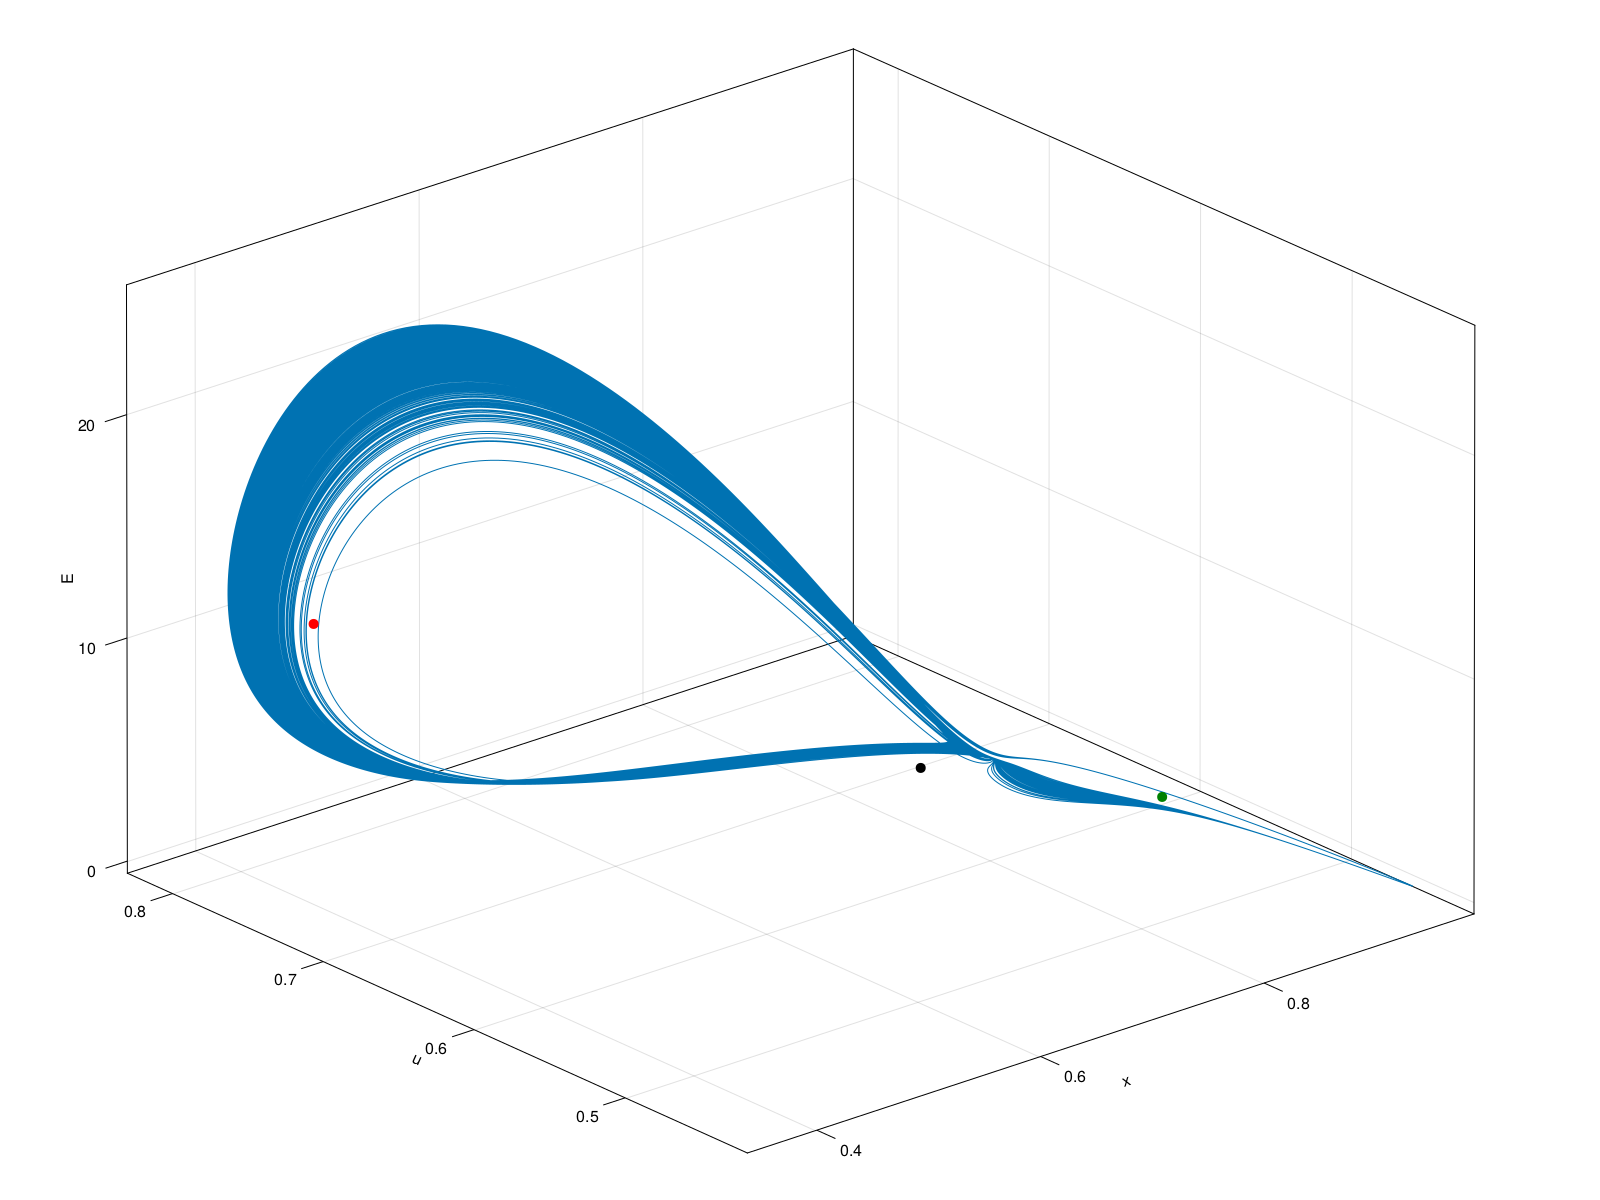

In [9]:
#ylow = 0.35; yup = 0.66
#zlow = 2; zup = 3.5
#xlow = 0.78; xup = 0.89
"""
E 1
x 2
u 3
y 4
"""

f = Figure(resolution = (1600, 1200))

ax = Axis3(f[1, 1], xlabel = "x", ylabel = "u", zlabel = "E") #, elevation = 0.5pi, azimuth = 0.4pi)

tf = 2000000

lines!(tr[1:tf, 2], tr[1:tf, 3], tr[1:tf, 1], linewidth = 1)


scatter!( first_eq[2], first_eq[3],   first_eq[1], color = "black", markersize = 10 )
scatter!( second_eq[2], second_eq[3], second_eq[1], color = "red", markersize = 10 )
scatter!( third_eq[2], third_eq[3], third_eq[1], color = "green", markersize = 10 )

f

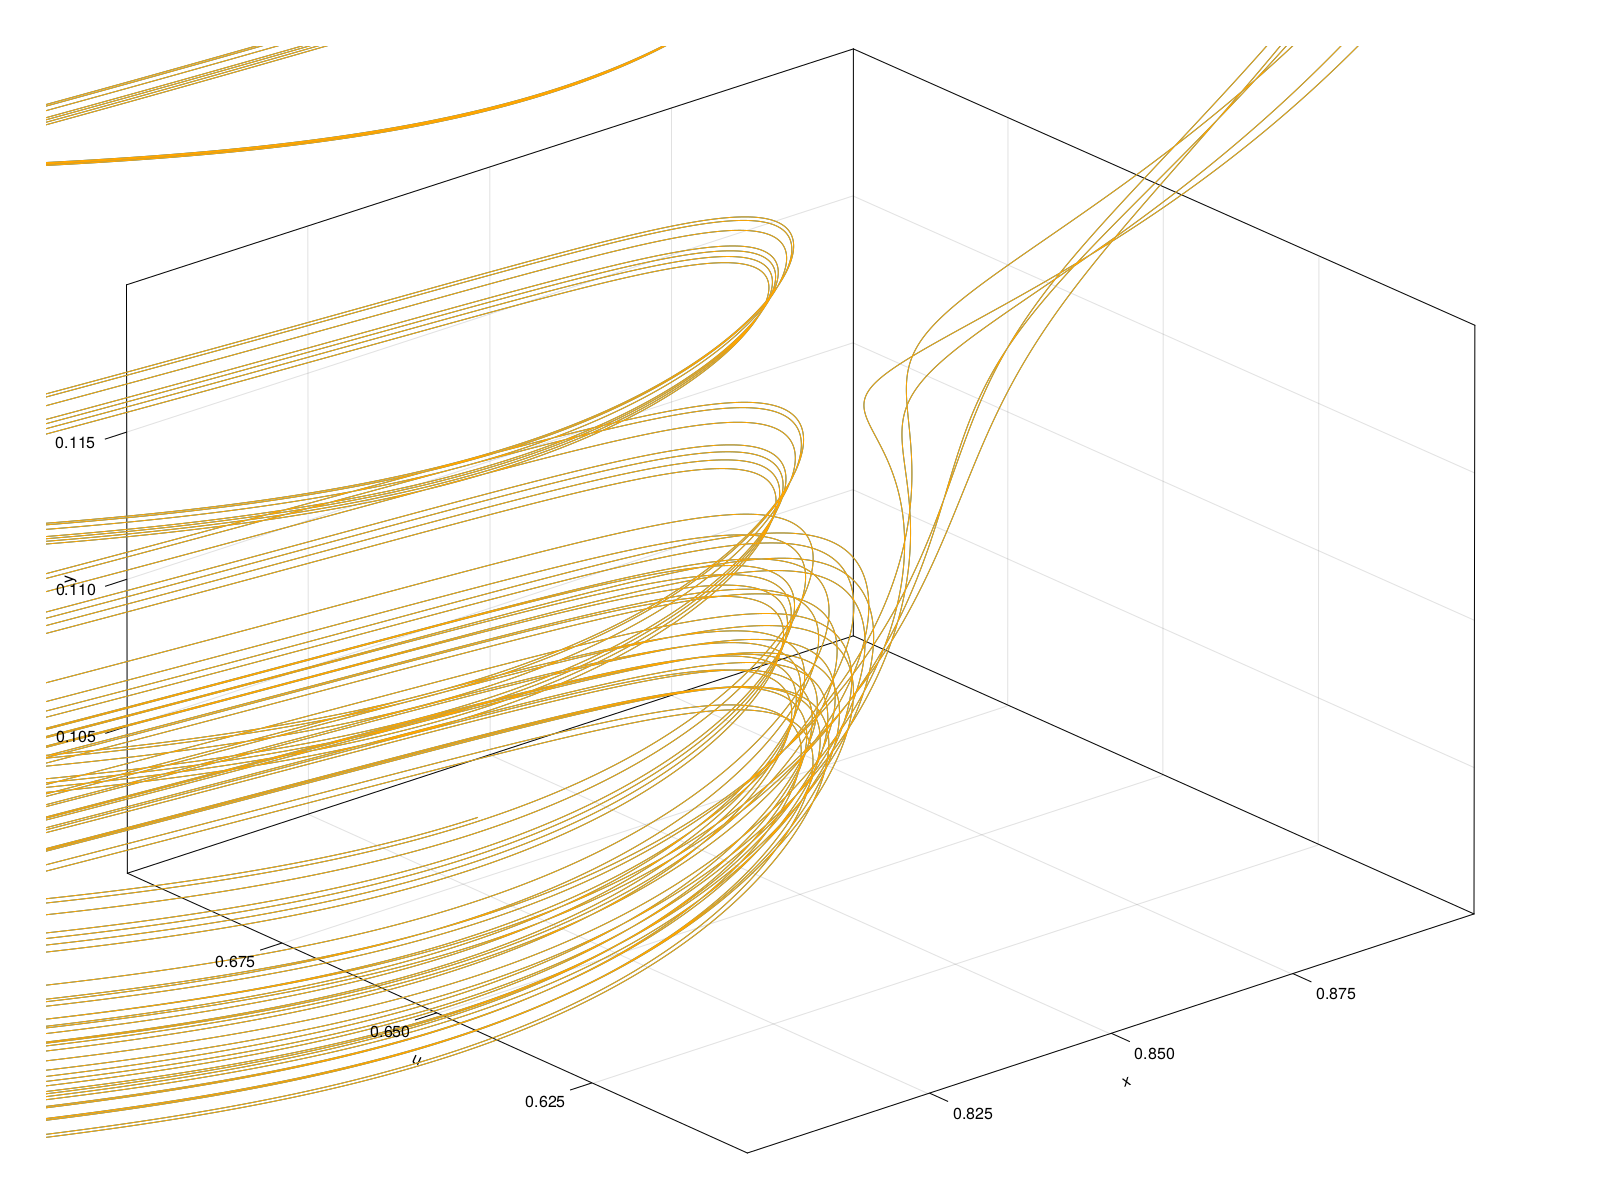

In [49]:
ylow = 0.6; yup = 0.7
zlow = 0.1; zup = 0.12
xlow = 0.8; xup = 0.9

"""
E 1
x 2
u 3
y 4
"""

ts, tf = 110000, 210000

f = Figure(resolution = (1600, 1200))

ax = Axis3(f[1, 1], xlabel = "x", ylabel = "u", zlabel = "y")



ylims!(ylow, yup)
zlims!(zlow, zup)
xlims!(xlow, xup)


lines!(tr[ts:tf, 2], tr[ts:tf, 3], tr[ts:tf, 4], linewidth = 1)

lines!(tr1[ts:tf, 2], tr1[ts:tf, 3], tr1[ts:tf, 4], linewidth = 1, color = "orange")

scatter!( first_eq[2], first_eq[3],   first_eq[4], color = "black", markersize = 10 )
scatter!( second_eq[2], second_eq[3], second_eq[4], color = "red", markersize = 10 )
scatter!( third_eq[2], third_eq[3], third_eq[4], color = "green", markersize = 10 )
f